In [304]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.snowball import SnowballStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import time
import random 
import requests
from bs4 import BeautifulSoup 
import os
import pickle
import pandas as pd

linkedinuser = os.environ.get('linkedinuser')
linkedpass = os.environ.get('linkedpass')

sns.set()

In [2]:
linkedinuser


'alvintomlin@outlook.com'

In [3]:
# Scrape a list of current user agents 
url = 'https://developers.whatismybrowser.com/useragents/explore/operating_system_name/windows/'

def get_agent_list(link,pagenum):
    """
       Use this function to scape and generate a list of windows user agent strings.
       Page num is calculated by visiting the url provided to this function and checking
       to see how many pages are availble to scrape.
    """
    try:
        for i in range(pagenum):
            time.sleep(1)
            r = requests.get(url)
            if r.status_code == 200:
                data = r.content
                soup = BeautifulSoup(data,'html.parser') 
                anchors = [a.get_text() for a in (td.find('a') for td in soup.findAll('td')) if a]
            return anchors
    except Exception as e:
        print(e)

In [4]:
def generate_user_agent(agent_list):
    try:
        num = random.randint(0,len(agent_list))
        ua = agent_list[num]
        opts = Options()
        return ua
    except Exception as e:
        print(e)



In [44]:
def login(uname,pw,agent):

    try:
        pages = []
        offset = 25
        opts = Options()
        opts.add_argument(f"user-agent={agent}")
        driver = webdriver.Chrome('../driver/chromedriver',options=opts)
        driver.get('http://linkedin.com')
        login = driver.find_element_by_xpath('/html/body/nav/section[2]/form/div[1]/div[1]/input')
        time.sleep(random.randrange(3,8))
        login.send_keys(uname)
        password = driver.find_element_by_xpath('/html/body/nav/section[2]/form/div[1]/div[2]/input')
        time.sleep(random.randrange(3,8))
        password.send_keys(pw)   
        time.sleep(random.randrange(1,8))
        submit = driver.find_element_by_xpath('/html/body/nav/section[2]/form/div[2]/button')
        submit.send_keys(Keys.ENTER)
        time.sleep(random.randrange(3,8))
 
        
    # scrape the job cards from the inital jobs landing page
        for i in range(41):
            if i == 0:
                time.sleep(random.randrange(3,8))
                driver.get('https://www.linkedin.com/jobs/search/?geoId=90000049&keywords=data%20analyst&location=Los%20Angeles%20Metropolitan%20Area')
                action = ActionChains(driver)
                action.send_keys(Keys.TAB * 50)
                action.perform()
                text_contents = BeautifulSoup(driver.page_source)
                time.sleep(random.randrange(3,8))
                pages.extend(text_contents)
              
        
        # Get the acutal html for the individual job post    
            else:
                driver.get(f'https://www.linkedin.com/jobs/search/?geoId=90000049&keywords=data%20analyst&location=Los%20Angeles%20Metropolitan%20Area&start={offset}')
                time.sleep(random.randrange(3,8))
                action = ActionChains(driver)
                action.send_keys(Keys.TAB * 50)
                action.perform()
                time.sleep(random.randrange(3,8))
                text_contents = BeautifulSoup(driver.page_source)
                pages.extend(text_contents)
                offset += 25
                time.sleep(random.randrange(3,8))
            

        return pages
    
    except Exception as e:
        print(e)
    


In [6]:
data = get_agent_list(url,11)
# 

In [7]:
ua = generate_user_agent(data)
ua

'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'

In [45]:
jobs = login(uname=linkedinuser,pw=linkedpass,agent=ua)

In [57]:
range(len(jobs))

range(0, 41)

In [56]:
test[0].find('a','job-card-search__link-wrapper js-focusable disabled ember-view','href')

<a class="job-card-search__link-wrapper js-focusable disabled ember-view" data-control-id="qei+/DFFTRqLTbTvtyD68A==" href="/jobs/view/1771636252/?eBP=CwEAAAFwy-BmFCEbyeZzva4W6O56Ie5CaaC0UikHD0WWSz3ZXMCVPdBKkptb7WZhy8FigsW9V7Lrv6WhBdf2gG_-kClXQFrQZMdpCCYLWILIzkcbXddFW0wGt3h-1Fl1CJE5lHsGjdfC1EJk500XwJvZtorCkvsHPo4f4US88T6YidM4eGJAUVCKY1LSkKLbBtc9j_zFnMkyeS4uvBaejbT1IxZVXSAn9SyXf255KqvklvcJ8n8HwFcy9gW0o8ro3nSi6x2o76dvsoTAjsPPJTnTOLXauewg4NeWHu_6YYMbM8LHR5WGZWpDnJxuE9aG-D7kXB65BGIXvzBEtEnSkJGCovF-LO3F9H1Pot1Vj8qHpS3w8Vm3&amp;refId=bea39fa7-84d0-494c-8a3e-d5d76dc4ae99&amp;trk=d_flagship3_search_srp_jobs" id="ember409">            Data Analyst
              <span class="job-card-search__promoted-tag label-16dp ml1">
                Promoted
              </span>
</a>

In [69]:
links = []
for x in range(len(jobs)):
    for a in jobs[x].find_all('a','job-card-search__link-wrapper js-focusable disabled ember-view', href=True):
        links.append(a['href'])
    

In [72]:
with open('../data/job_links.pkl','wb') as f:
    pickle.dump(links,f)
    

In [76]:
links[1]

'/jobs/view/1755212058/?eBP=CwEAAAFw23axo7bzgaF0BPjrep0sMn7Bjwi2KbbFA3WFmXnE9xgE4eYrHM_Mr9HXfjDzPscfX8Xw2799f6Mt25JhwyiWWyMsM4gwcb6xxTQDq41onJTv7vophFeK889z0yAVs2beO-tLAiUw5fFy_cbfhu7AMgidS3erResOGWRkDT5Kk30435OUul1SYZF1Qtn7dHWTc8TVEQWfZwe7jIvRaxod9Hw4PeZTbljW2ji1QHM13AjxWlQpSBQCKU9-FRtoOtEsXG6mbdrYvfSnKuarXTdkb5Jr08QGgO4EPd0VW63K_H-IxHQJG0oiIofxNNqQrT_T4WDWf42GzkodTIkUBT5k8a83QTMST8t5eTNwwYWI7V9y&recommendedFlavor=COMPANY_RECRUIT&refId=196b376c-4835-46d7-9190-efaee32e20c0&trk=d_flagship3_search_srp_jobs'

In [77]:
def job_listings(uname,pw,agent,link_list):

    try:
        job_pages = []
        opts = Options()
        opts.add_argument(f"user-agent={agent}")
        driver = webdriver.Chrome('../driver/chromedriver',options=opts)
        driver.get('http://linkedin.com')
        login = driver.find_element_by_xpath('/html/body/nav/section[2]/form/div[1]/div[1]/input')
        time.sleep(random.randrange(3,8))
        login.send_keys(uname)
        password = driver.find_element_by_xpath('/html/body/nav/section[2]/form/div[1]/div[2]/input')
        time.sleep(random.randrange(3,8))
        password.send_keys(pw)   
        time.sleep(random.randrange(1,8))
        submit = driver.find_element_by_xpath('/html/body/nav/section[2]/form/div[2]/button')
        submit.send_keys(Keys.ENTER)
        time.sleep(random.randrange(3,8))
 
        for link in links:
            driver.get(f'https://www.linkedin.com{link}')
            time.sleep(random.randrange(2,4))
            job_pages.extend(BeautifulSoup(driver.page_source))
        
        return job_pages
    
    except Exception as e:
        print(e)

In [80]:
jobs_final = job_listings(uname=linkedinuser,pw=linkedpass,agent=ua,link_list=links)

In [ ]:
#ember4 > div.application-outlet > div.authentication-outlet > section.job-search-ext.job-search-ext--two-pane > div.jobs-search-two-pane__wrapper.jobs-search-two-pane__wrapper--two-pane > div > div > div.jobs-search-two-pane__results.display-flex > div.jobs-search-results.jobs-search-results--is-two-pane > div > ula

In [81]:
len(jobs_final)

679

In [94]:
jobs_final[0].find_all('span','jobs-ppc-criteria__value')

[<span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Data Analysis
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Alteryx
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Data Maintenance
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Customer Support
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Tableau
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Sales Growth
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Tenacious Work Ethic
             </span>,
 <span class="jobs-ppc-criteria__value t-14 t-black t-normal ml2 block">
               Computer Literacy
             </span>,
 <sp

In [99]:
job_details = []
for job in range(len(jobs_final)):
    for detail in jobs_final[job].find_all('span','jobs-ppc-criteria__value'):
        job_details.append(detail.get_text())


In [132]:
skills = pd.DataFrame(job_details,
                      columns=['skills'])

In [138]:
skills = skills.apply(lambda x: x.str.strip())

In [142]:
skills = skills.apply(lambda y: y.str.lower())

In [306]:
lemmatizer = nltk.stem.WordNetLemmatizer()
skills = skills.apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) 

In [239]:
# fig, ax = plt.subplots(figsize=(30,20))
# ax.tick_params(labelsize=30)
# skills.skills.str.split(expand=True,).stack().value_counts()[:20].sort_values(ascending=False).plot(kind='barh',ax=ax)


In [318]:
cvec = CountVectorizer(ngram_range=(2,6))
term_mat = cvec.fit_transform(skills.skills)
term_df = pd.DataFrame(term_mat.toarray(), columns = cvec.get_feature_names())


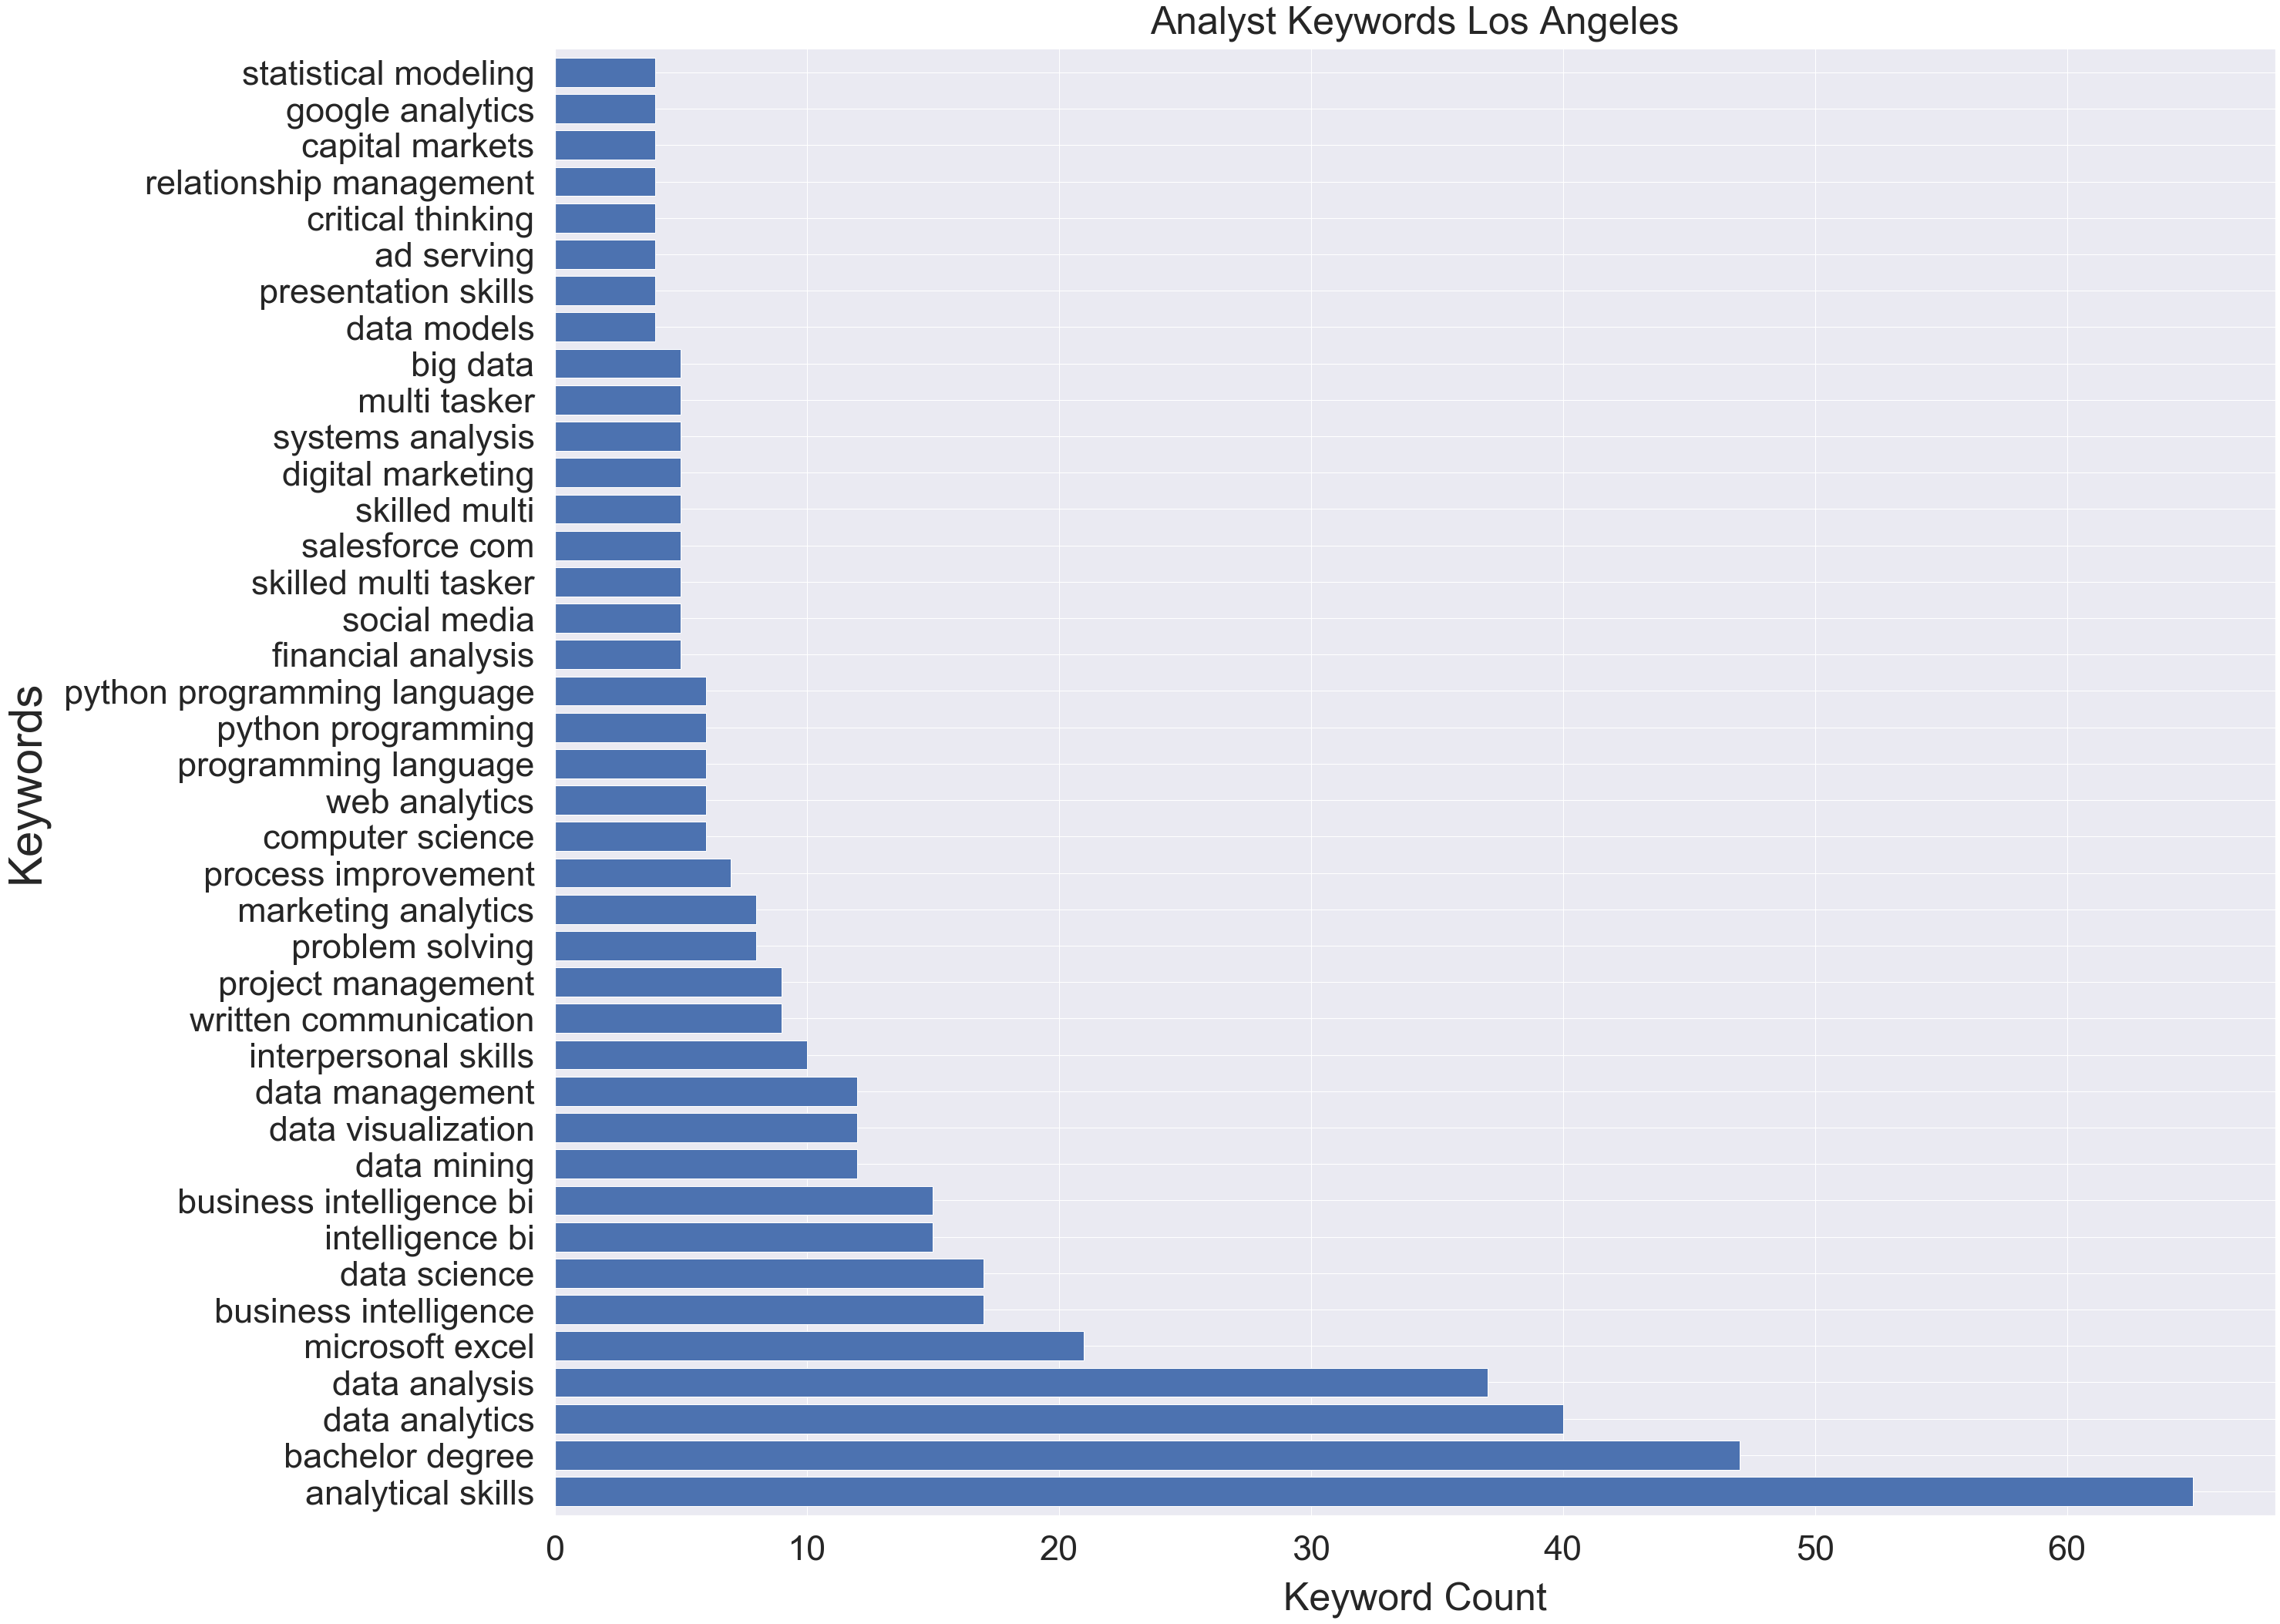

In [319]:
fig, ax = plt.subplots(figsize=(40,35))
ax.tick_params(labelsize=45,pad=20)
ax.set_title('Analyst Keywords Los Angeles',fontsize=50,pad=20)
ax.set_xlabel('Keyword Count',fontsize=50,labelpad=20)
ax.set_ylabel('Keywords',fontsize=60,labelpad=20)
term_df.sum().sort_values(ascending=False)[:40].plot(kind='barh',width=.8,
                                                    edgecolor='white')

In [315]:
skills.to_csv('../data/skills_keyword.csv')

In [ ]:
jobs_final[1]